In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sas7bdat import SAS7BDAT
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [2]:
day = pd.read_csv('day.csv')
day['temp'] = day['temp'] * 47 -8
day['atemp'] = day['atemp'] * 66 -16
day['hum'] = day['hum'] * 100
day['windspeed'] = day['windspeed'] * 67
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,15.283085,15.307363,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,8.603397,10.755438,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-5.220871,-10.781406,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,7.842925,6.297605,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,15.421651,16.124378,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,22.804575,24.167732,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,32.498349,39.499136,97.250000,34.000021,3410.000000,6946.000000,8714.000000


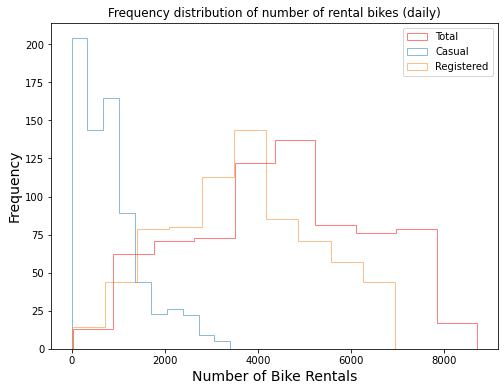

In [20]:
#Draw a histogram of cnt values
plt.figure(figsize=(8,6))
plt.hist(day['cnt'],histtype='step', bins=10, alpha=0.5, label="Total",color = 'red')
plt.hist(day['casual'],histtype='step', bins=10, alpha=0.5, label="Casual")
plt.hist(day['registered'],histtype='step', bins=10, alpha=0.5, label="Registered")
plt.xlabel("Number of Bike Rentals", size=14)
plt.ylabel("Frequency", size=14)
plt.title("Frequency distribution of number of rental bikes (daily)")
plt.legend(loc='upper right');

In [14]:
hour = pd.read_csv('hour.csv')
hour['temp'] = hour['temp'] * 47 -8
hour['atemp'] = hour['atemp'] * 66 -16
hour['hum'] = hour['hum'] * 100
hour['windspeed'] = hour['windspeed'] * 67
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,15.358397,15.401157,62.722884,12.736540,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,9.050138,11.342114,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,7.980000,5.997800,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,15.500000,15.996800,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,23.020000,24.999200,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,39.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


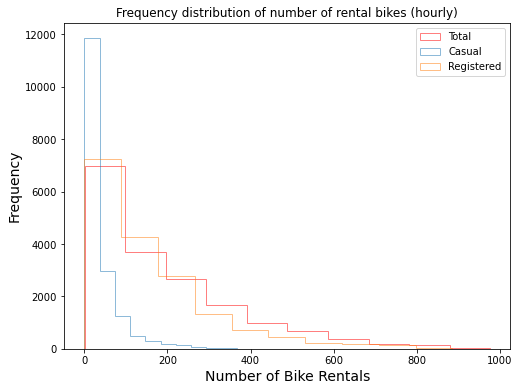

In [19]:
#Draw a histogram of cnt values
plt.figure(figsize=(8,6))
plt.hist(hour['cnt'],histtype='step', bins=10, alpha=0.5, label="Total",color = 'red')
plt.hist(hour['casual'],histtype='step', bins=10, alpha=0.5, label="Casual")
plt.hist(hour['registered'],histtype='step', bins=10, alpha=0.5, label="Registered")
plt.xlabel("Number of Bike Rentals", size=14)
plt.ylabel("Frequency", size=14)
plt.title("Frequency distribution of number of rental bikes (hourly)")
plt.legend(loc='upper right');

In [24]:
#Import packages and define target variable (Gradient Boosted Decision Tree)
from sklearn.ensemble import GradientBoostingRegressor
y = np.array(day.cnt)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
#Define input variable
X=day.values
#Split the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

C:\Users\hasib\AppData\Local\Temp/ipykernel_60364/2820739092.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


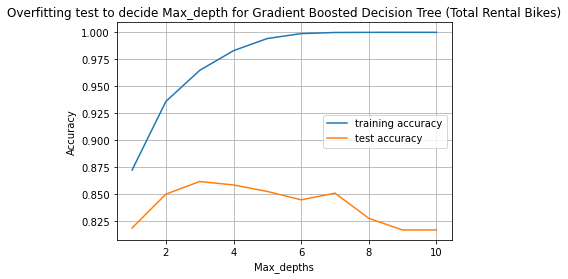

In [25]:
#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
depth_settings = range(1, 11)

for n_depth in depth_settings:
    # build the model
    tree = GradientBoostingRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for Gradient Boosted Decision Tree (Total Rental Bikes)");

Accuracy on training set: 0.965
Accuracy on test set: 0.862


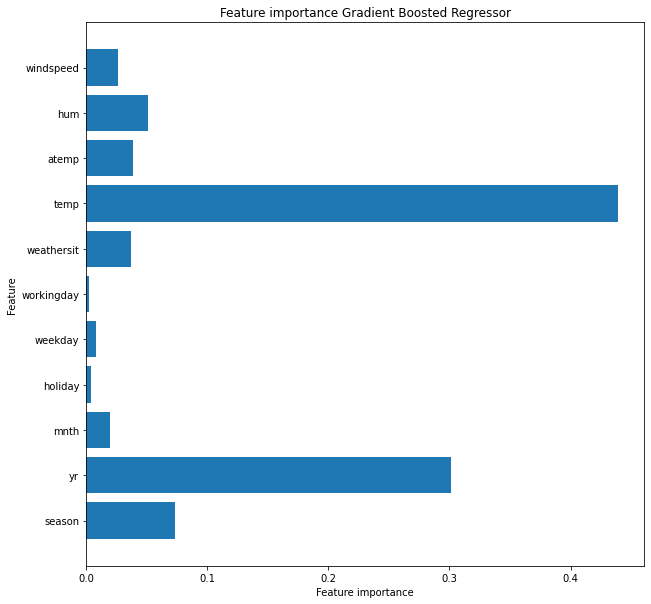

In [26]:
#Take max_depth = 3
#Fit a gradient boosted regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBR.fit(X_train, y_train)
#Check accuracy score
print("Accuracy on training set: {:.3f}".format(GBR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(GBR.score(X_test, y_test)))
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_GBR(model):
    n_features = len(day.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), day.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature importance Gradient Boosted Regressor")

plot_feature_importances_GBR(GBR)

C:\Users\hasib\AppData\Local\Temp/ipykernel_60364/3131651689.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


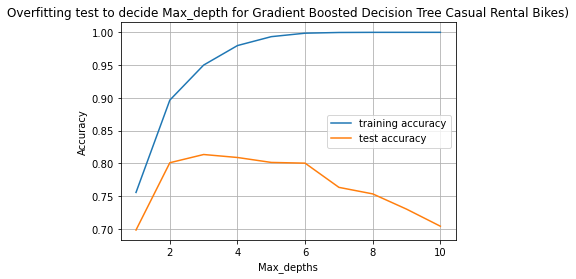

In [27]:
day = pd.read_csv('day.csv')
day['temp'] = day['temp'] * 47 -8
day['atemp'] = day['atemp'] * 66 -16
day['hum'] = day['hum'] * 100
day['windspeed'] = day['windspeed'] * 67
#Import packages and define target variable (Gradient Boosted Decision Tree)
from sklearn.ensemble import GradientBoostingRegressor
y = np.array(day.casual)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
#Define input variable
X=day.values
#Split the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)
#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
depth_settings = range(1, 11)

for n_depth in depth_settings:
    # build the model
    tree = GradientBoostingRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for Gradient Boosted Decision Tree Casual Rental Bikes)");

Accuracy on training set: 0.950
Accuracy on test set: 0.814


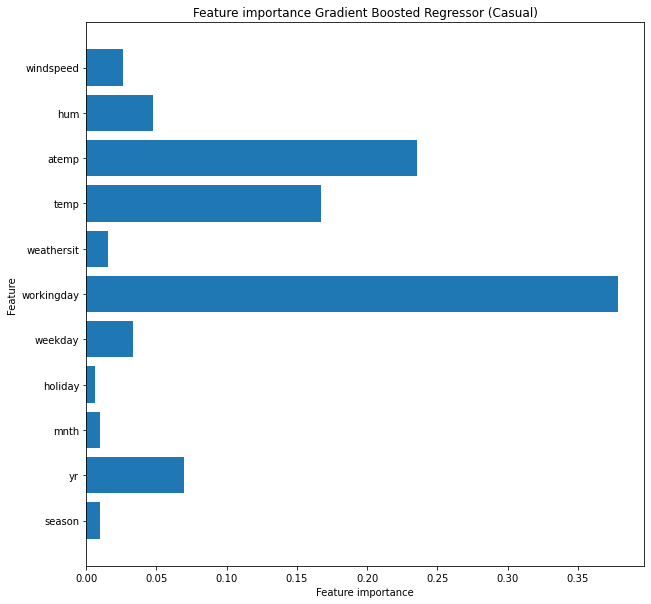

In [29]:
#Take max_depth = 3
#Fit a gradient boosted regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBR.fit(X_train, y_train)
#Check accuracy score
print("Accuracy on training set: {:.3f}".format(GBR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(GBR.score(X_test, y_test)))
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_GBR(model):
    n_features = len(day.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), day.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature importance Gradient Boosted Regressor (Casual)")

plot_feature_importances_GBR(GBR)

C:\Users\hasib\AppData\Local\Temp/ipykernel_60364/2811317753.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


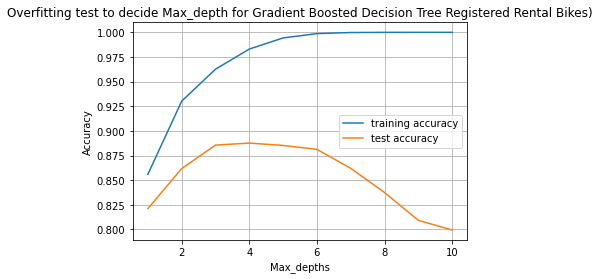

In [30]:
day = pd.read_csv('day.csv')
day['temp'] = day['temp'] * 47 -8
day['atemp'] = day['atemp'] * 66 -16
day['hum'] = day['hum'] * 100
day['windspeed'] = day['windspeed'] * 67
#Import packages and define target variable (Gradient Boosted Decision Tree)
from sklearn.ensemble import GradientBoostingRegressor
y = np.array(day.registered)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
#Define input variable
X=day.values
#Split the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)
#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
depth_settings = range(1, 11)

for n_depth in depth_settings:
    # build the model
    tree = GradientBoostingRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for Gradient Boosted Decision Tree Registered Rental Bikes)");

Accuracy on training set: 0.963
Accuracy on test set: 0.886


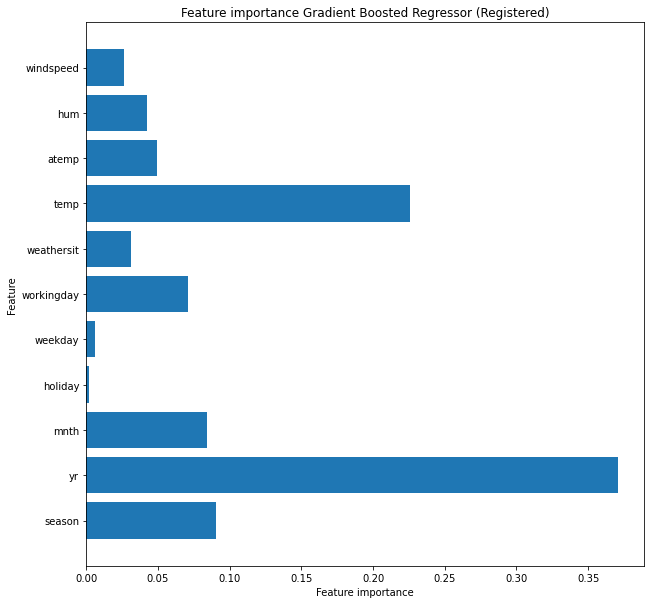

In [32]:
#Take max_depth = 3
#Fit a gradient boosted regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBR.fit(X_train, y_train)
#Check accuracy score
print("Accuracy on training set: {:.3f}".format(GBR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(GBR.score(X_test, y_test)))
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_GBR(model):
    n_features = len(day.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), day.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature importance Gradient Boosted Regressor (Registered)")

plot_feature_importances_GBR(GBR)

In [34]:
#OLS Total
import statsmodels.api as sm
day = pd.read_csv('day.csv')
day['temp'] = day['temp'] * 47 -8
day['atemp'] = day['atemp'] * 66 -16
day['hum'] = day['hum'] * 100
day['windspeed'] = day['windspeed'] * 67
y = day['cnt']
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = day
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\hasib\AppData\Local\Temp/ipykernel_60364/3872442584.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
E:\Python\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     194.4
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          5.26e-179
Time:                        19:59:26   Log-Likelihood:                -4479.6
No. Observations:                 548   AIC:                             8983.
Df Residuals:                     536   BIC:                             9035.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2564.3768    274.050      9.357      0.000    2026.034    3102.720
season       551.9622     63.956      8.630      0.000     426.327     677.598
yr          2034.4883     75.005     27.125      0.000    1887.148    2181.828
mnth         -45.1323     19.817     -2.277      0.023     -84.061      -6.204
holiday     -372.2502    236.515     -1.574      0.116    -836.860      92.360
weekday       60.4616     18.723      3.229      0.001      23.682      97.241
workingday   206.7145     82.975      2.491      0.013      43.718     369.711
weathersit  -617.4206     89.681     -6.885      0.000    -793.590    -441.251
temp          66.4440     30.943      2.147      0.032       5.659     127.229
atemp         31.8966     24.914      1.280      0.201     -17.045      80.838
hum           -9.1574      3.518     -2.603      0.009     -16.068      -2.247
windspeed    -45.6782      7.820     -5.841      0.000     -61.039     -30.317
==============================================================================
Omnibus:                       77.287   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.464
Skew:                          -0.775   Prob(JB):                     4.32e-37
Kurtosis:                       5.220   Cond. No.                         525.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#OLS Casual
import statsmodels.api as sm
day = pd.read_csv('day.csv')
day['temp'] = day['temp'] * 47 -8
day['atemp'] = day['atemp'] * 66 -16
day['hum'] = day['hum'] * 100
day['windspeed'] = day['windspeed'] * 67
y = day['casual']
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = day
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\hasib\AppData\Local\Temp/ipykernel_60364/2284699345.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
E:\Python\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     100.7
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          1.06e-122
Time:                        20:00:41   Log-Likelihood:                -4028.3
No. Observations:                 548   AIC:                             8081.
Df Residuals:                     536   BIC:                             8132.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1046.0076    120.273      8.697      0.000     809.743    1282.273
season        64.8876     28.069      2.312      0.021       9.749     120.026
yr           284.5879     32.918      8.645      0.000     219.924     349.252
mnth         -14.3138      8.697     -1.646      0.100     -31.399       2.771
holiday     -158.1235    103.800     -1.523      0.128    -362.029      45.782
weekday       18.9451      8.217      2.306      0.022       2.804      35.087
workingday  -771.8370     36.416    -21.195      0.000    -843.372    -700.302
weathersit  -119.8377     39.359     -3.045      0.002    -197.154     -42.521
temp          35.0914     13.580      2.584      0.010       8.414      61.768
atemp          5.0171     10.934      0.459      0.647     -16.462      26.496
hum           -3.4575      1.544     -2.239      0.026      -6.490      -0.425
windspeed    -14.3936      3.432     -4.194      0.000     -21.135      -7.652
==============================================================================
Omnibus:                       76.800   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.223
Skew:                           0.729   Prob(JB):                     1.34e-41
Kurtosis:                       5.473   Cond. No.                         525.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#OLS Registered
import statsmodels.api as sm
day = pd.read_csv('day.csv')
day['temp'] = day['temp'] * 47 -8
day['atemp'] = day['atemp'] * 66 -16
day['hum'] = day['hum'] * 100
day['windspeed'] = day['windspeed'] * 67
y = day['registered']
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = day
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\hasib\AppData\Local\Temp/ipykernel_60364/3541063021.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
E:\Python\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          7.85e-189
Time:                        20:01:40   Log-Likelihood:                -4345.2
No. Observations:                 548   AIC:                             8714.
Df Residuals:                     536   BIC:                             8766.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1518.3692    214.440      7.081      0.000    1097.123    1939.615
season       487.0747     50.045      9.733      0.000     388.767     585.383
yr          1749.9004     58.691     29.816      0.000    1634.609    1865.192
mnth         -30.8184     15.507     -1.987      0.047     -61.280      -0.357
holiday     -214.1267    185.070     -1.157      0.248    -577.678     149.424
weekday       41.5165     14.650      2.834      0.005      12.737      70.296
workingday   978.5515     64.927     15.072      0.000     851.009    1106.094
weathersit  -497.5829     70.174     -7.091      0.000    -635.433    -359.732
temp          31.3526     24.213      1.295      0.196     -16.211      78.916
atemp         26.8796     19.495      1.379      0.169     -11.417      65.176
hum           -5.6999      2.753     -2.071      0.039     -11.107      -0.292
windspeed    -31.2846      6.119     -5.113      0.000     -43.304     -19.265
==============================================================================
Omnibus:                      143.727   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              502.127
Skew:                          -1.188   Prob(JB):                    9.21e-110
Kurtosis:                       7.043   Cond. No.                         525.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

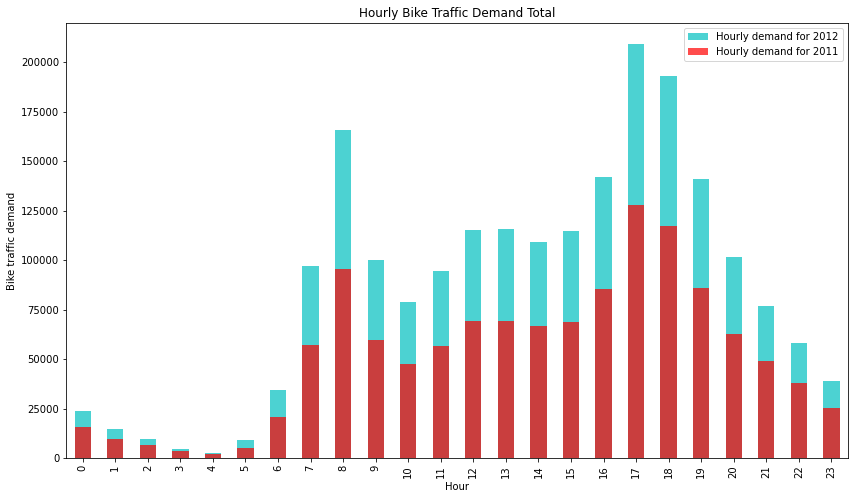

In [39]:
hour = pd.read_csv('hour.csv')
#Sort the dataset to get 2012 data
hour_2012 = hour[hour['dteday'] >= "2012-01-01"]
hour_2011 = hour[hour['dteday'] < "2012-01-01"]
#Plot hourly demand
hourly_demand_2011 = hour_2011.groupby('hr')['cnt'].sum()
hourly_demand_2012 = hour_2012.groupby('hr')['cnt'].sum()
hourly_demand_2012.plot(kind='bar',figsize=[14, 8],linewidth='4',alpha=0.7, color='c',label='Hourly demand for 2012');
hourly_demand_2011.plot(kind='bar',figsize=[14, 8],linewidth='4',alpha=0.7, color='r',label='Hourly demand for 2011');
plt.xlabel("Hour");
plt.ylabel("Bike traffic demand")
plt.title("Hourly Bike Traffic Demand Total");
plt.legend(loc='upper right');

In [40]:
#Do OLS for Total, Casual and Registered with hour data

In [42]:
#RMSE and R2 check for different models
day = pd.read_csv('day.csv')
day['temp'] = day['temp'] * 47 -8
day['atemp'] = day['atemp'] * 66 -16
day['hum'] = day['hum'] * 100
day['windspeed'] = day['windspeed'] * 67
y = np.array(day.cnt)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = day.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_LR=',(r2_score(y_test,y_pred)))
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Check Accuracy
print('RMSE_Ridge=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Ridge=',(r2_score(y_test,y_pred)))
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred = cld.predict(X_test)
#Check Accuracy
print('RMSE_Lasso=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Lasso=',(r2_score(y_test,y_pred)))
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#Check Accuracy
print('RMSE_Elastic=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Elastic=',(r2_score(y_test,y_pred)))
#Fit a GBDT regressor with max_depth = 3
GBDT = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBDT.fit(X_train, y_train)
y_pred = GBDT.predict(X_test)
#Check Accuracy
print('RMSE_GBDT=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_GBDT=',(r2_score(y_test,y_pred)))

RMSE_LR= 881.0898652570436
R2_LR= 0.7904624881874929
RMSE_Ridge= 881.3284794660311
R2_Ridge= 0.790348980133779
RMSE_Lasso= 881.1505496278149
R2_Lasso= 0.7904336237312122
RMSE_Elastic= 1158.1004428237704
R2_Elastic= 0.6379956191342346
RMSE_GBDT= 715.9990847028512
R2_GBDT= 0.8616286095112616


C:\Users\hasib\AppData\Local\Temp/ipykernel_60364/502491706.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


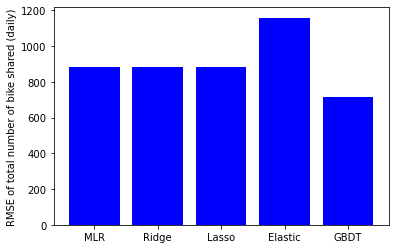

In [44]:
Model = ['MLR','Ridge','Lasso','Elastic','GBDT']
RMSE = [881.0898652570436,881.3284794660311,881.1505496278149,1158.1004428237704,715.9990847028512]
plt.bar(Model,RMSE, color ='blue')
plt.ylabel("RMSE of total number of bike shared (daily)");

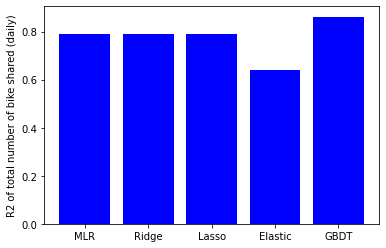

In [45]:
Model = ['MLR','Ridge','Lasso','Elastic','GBDT']
RMSE = [0.7904624881874929,0.790348980133779,0.7904336237312122,0.6379956191342346,0.8616286095112616]
plt.bar(Model,RMSE, color ='blue')
plt.ylabel("R2 of total number of bike shared (daily)");

In [ ]:
#Repeat steps for casual and registered
#Event detection accuracy
#Please sort the day and hour file from the event dates below and repeat regression steps. Keep event dates as test data
2012-10-29
2012-10-30
2012-10-19
2012-7-4
2012-11-23
2012-12-24
2012-10-8
2012-5-27
2012-11-22
2012-11-12
2012-4-16
2012-3-23
2012-9-18
2012-7-18
2012-6-1
2012-12-4
2012-5-13
2012-2-11
2012-1-23
2012-9-29
2012-11-25
2012-10-7
2012-4-7
2012-5-26
2012-5-21
2012-9-15
2012-10-11
2012-10-12
2012-1-29
2012-5-19